In [1]:
# Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import requests
import json
from scipy.stats import linregress

from config import api_key
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


641


In [3]:
#city list needs to be fixed to be able to build URLs without empty spaces for those cities with two or more words in their name. The character %20 will be added
cities_for_url=[]

for a in cities:
    b=a.replace(" ","%20")
    cities_for_url.append(b)
    
cities_for_url

['yulara',
 'yellowknife',
 'bedesa',
 'sataua',
 'mataura',
 'chokurdakh',
 'stillwater',
 'rikitea',
 'tiksi',
 'atuona',
 'bubaque',
 'cape%20town',
 'busselton',
 'port%20elizabeth',
 'aripuana',
 'deputatskiy',
 'belushya%20guba',
 'butaritari',
 'chichica',
 'kodiak',
 'saskylakh',
 'port%20alfred',
 'ushuaia',
 'thompson',
 'gamba',
 'pacific%20grove',
 'lorengau',
 'kapaa',
 'samsun',
 'hermanus',
 'narsaq',
 'attawapiskat',
 'raga',
 'vaini',
 'tuktoyaktuk',
 'lodja',
 'krasnoselkup',
 'rantepao',
 'kaitangata',
 'provideniya',
 'yerbogachen',
 'rostaq',
 'panaba',
 'pergine%20valsugana',
 'bahar',
 'mullaitivu',
 'barra%20do%20garcas',
 'guerrero%20negro',
 'bitkine',
 'puerto%20ayora',
 'bengkulu',
 'lolua',
 'zyryanka',
 'souillac',
 'batemans%20bay',
 'roald',
 'terrace%20bay',
 'bambous%20virieux',
 'aguimes',
 'tsnori',
 'punta%20arenas',
 'east%20london',
 'taolanaro',
 'bredasdorp',
 'upernavik',
 'umarkot',
 'homer',
 'dillon',
 'shingu',
 'vila%20franca%20do%20campo'

In [4]:
api_key = "3b3e1d7845d02897a766921cd3808fa3"

#This will allow to bring the right units
units="imperial"

#Creating empty lists to fill up as the requests are done inside a loop
latitude=[]
temp=[]
humidity=[]
wind=[]
cloud=[]
city_name=[]

#counter to determine how many cities from "citipy" are not found in "openweathermap.com"
i=1

#creating URLs to request weather data
for name in cities_for_url:
    url='http://api.openweathermap.org/data/2.5/weather?q='
    query_url = f'{url}{name}&appid={api_key}&units={units}'
    
    response = requests.get(query_url)
    response_json = response.json()
     
    # An exception code block has to be created since the city list is built from a different site and we don't know if the same cities can be found in the second site 
    try:
        latitude.append(response_json['coord']['lat'])
        temp.append(response_json['main']['temp'])
        humidity.append(response_json['main']['humidity'])
        wind.append(response_json['wind']['speed'])
        cloud.append(response_json['clouds']['all'])
        city_name.append(response_json['name'])
    except KeyError:
        i=i+1
print(f'there are {i} cities not found')

there are 60 cities not found


In [5]:
#Creating a dictionary with the required variables to later make it a data frame
weather_dict={"Latitude":latitude,
             "Temp (F)":temp,
             "Humidity (%)":humidity,
             "Windspeed (mph)":wind,
             "Cloudiness (%)":cloud,
             "City":city_name}
weather_df=pd.DataFrame(weather_dict)
weather_df

,Latitude,Temp (F),Humidity (%),Windspeed (mph),Cloudiness (%),City
0,-25.2406,98.60,10,8.05,8,Yulara
1,62.4560,-34.31,67,4.61,20,Yellowknife
2,8.9000,72.19,36,1.54,56,Bedēsa
3,-46.1927,66.99,81,8.01,76,Mataura
4,70.6333,-25.17,87,1.88,1,Chokurdakh
...,...,...,...,...,...,...
577,64.8945,37.04,68,36.55,95,Olafsvik
578,19.8000,93.20,33,12.12,0,Puri
579,-6.2222,72.68,94,1.52,99,Jacareacanga
580,54.4815,14.29,96,9.31,95,Oktyabr'skiy


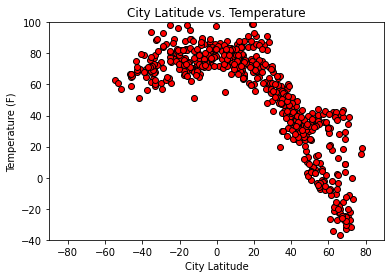

In [6]:
#creating scatter plot for temperature and latitude
plt.scatter(latitude, temp, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs. Temperature")
plt.xlabel("City Latitude")
plt.ylabel("Temperature (F)")
plt.xlim(-90,90)
plt.ylim(-40,100)

plt.show()

In [7]:
#Comment: The above plot shows the following:
# a) The highest temperatures are indeed reached around the Ecuator or latitude zero
# b) Northern hemisphere latitudes have much lower temperatures compared to southern cities 

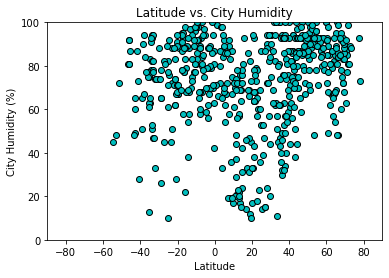

In [8]:
#creating scatter plot for humidity and latitude

plt.scatter(latitude, humidity, marker="o", facecolors="c", edgecolors="black")
plt.title("Latitude vs. City Humidity")
plt.ylabel("City Humidity (%)")
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.ylim(0,100)

plt.show()

In [9]:
#Comment: humidity seems to be more spread on northern cities compared to negative latitudes. South of the Ecuator seems to have more uniform high humidity.

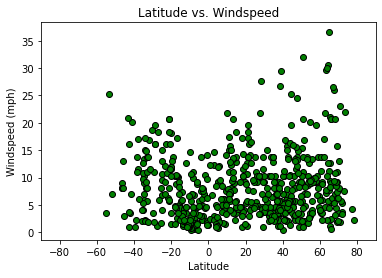

In [10]:
##creating scatter plot for humidity and latitude

plt.scatter(latitude, wind, marker="o", facecolors="g", edgecolors="black")
plt.title("Latitude vs. Windspeed")
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.xlim(-90,90)

plt.show()

In [11]:
#Comment: Overall wind speeds around 5 mph seems to have the highes frequency. Northern emisphere tends to have windier conditions as cities are further north 

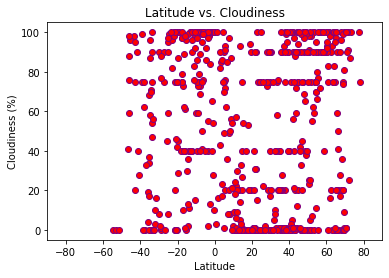

In [12]:
##creating scatter plot for cloudiness and latitude

plt.scatter(latitude, cloud,  marker="o", facecolors="r", edgecolors="purple")
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.xlim(-90,90)

plt.show()

In [13]:
#Comment:latitudes between -40 and -20 have a wide range of cloudiness. Betweeen -20 and 0, tend to be more overcasted. Passing the Ecuator until latitude +20, 
#cities have to be less cloudy and beyond +20 further north, cities tend to be more cloudy. This trend might be seasonal. Data pulled at the end of Feb. 

In [14]:
#breaking the data set into northern and souther cities
n_lat=[]
s_lat=[]
for var in latitude:
    if var>=0:
       n_lat.append(var)
    else:
        s_lat.append(var)
len(n_lat)

393

In [15]:
#Creating a data frame for the northern cities
n_lat_df=pd.DataFrame(n_lat)
n_lat_df["Latitude"]=n_lat_df
n_lat_df
north_df=pd.merge(weather_df,n_lat_df, on="Latitude")
north_df

,Latitude,Temp (F),Humidity (%),Windspeed (mph),Cloudiness (%),City,0
0,62.4560,-34.31,67,4.61,20,Yellowknife,62.4560
1,8.9000,72.19,36,1.54,56,Bedēsa,8.9000
2,70.6333,-25.17,87,1.88,1,Chokurdakh,70.6333
3,36.1156,57.27,94,9.22,90,Stillwater,36.1156
4,71.6872,-27.08,99,3.76,91,Tiksi,71.6872
...,...,...,...,...,...,...,...
388,21.3469,73.00,64,13.80,1,Makakilo City,21.3469
389,31.3525,51.80,87,8.05,0,Marsá Maţrūḩ,31.3525
390,64.8945,37.04,68,36.55,95,Olafsvik,64.8945
391,19.8000,93.20,33,12.12,0,Puri,19.8000


In [16]:
#Creating a data frame for the southern cities
s_lat_df=pd.DataFrame(s_lat)
s_lat_df["Latitude"]=s_lat_df
s_lat_df
south_df=pd.merge(weather_df,s_lat_df, on="Latitude")
south_df

,Latitude,Temp (F),Humidity (%),Windspeed (mph),Cloudiness (%),City,0
0,-25.2406,98.60,10,8.05,8,Yulara,-25.2406
1,-46.1927,66.99,81,8.01,76,Mataura,-46.1927
2,-23.1203,77.07,72,12.03,82,Rikitea,-23.1203
3,-9.8000,80.08,81,14.74,59,Atuona,-9.8000
4,-33.9258,68.22,82,2.30,0,Cape Town,-33.9258
...,...,...,...,...,...,...,...
186,-33.2926,62.71,77,14.76,56,Willowmore,-33.2926
187,-1.4085,71.60,100,4.61,40,Mounana,-1.4085
188,-8.0089,71.60,88,3.44,40,Olinda,-8.0089
189,-6.2222,72.68,94,1.52,99,Jacareacanga,-6.2222


The r-squared is: 0.7633881449711184


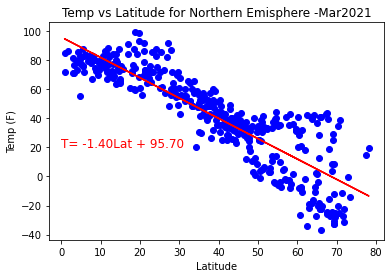

In [17]:
#Scatter plot for Northern cities - latitude vs Temp
xn_values=north_df["Latitude"]
yn_values=north_df["Temp (F)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xn_values, yn_values)
regress_values = xn_values * slope + intercept
line_eq = f"T= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xn_values,yn_values,color="blue")
plt.title("Temp vs Latitude for Northern Emisphere -Mar2021")


plt.plot(xn_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp (F)')
plt.savefig("../WeatherPy/images/temp_lat_north.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [18]:
#Comment: negative correlation between latitude and Temp for the northern cities. Good linear fit with a r-squared above 0.7. The further from the Ecuator, 
#the colder the city

The r-squared is: 0.15251188285567735


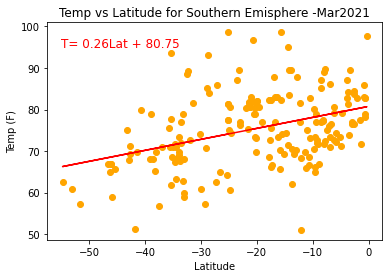

In [19]:
#Scatter plot for Southern cities - latitude vs Temp
xs_values=south_df["Latitude"]
ys_values=south_df["Temp (F)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ys_values)
regress_values = xs_values * slope + intercept
line_eq = f"T= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xs_values,ys_values,color="orange")
plt.title("Temp vs Latitude for Southern Emisphere -Mar2021")


plt.plot(xs_values,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp (F)')
plt.savefig("../WeatherPy/images/temp_lat_south.png")

#print(f"The correlation coefficient between Temp and latitude is {round(st.pearsonr(xs_values,ys_values)[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [20]:
#Comment: For southern cities, temperatures are more scattered. The r-sq coefficient demonstrates it with a lower value. The regression is positive, indicating that
#there's a maximum around latitude zero, since in the northern cities the regression is negative. Also, it can be seen that the regression slope is more horizontal. 
#This concludes that temperatures tend to be warmer even further south.

The r-squared is: 0.1659320817090492


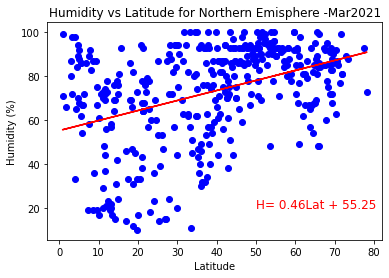

In [21]:
xn_values=north_df["Latitude"]
yn_values=north_df["Humidity (%)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xn_values, yn_values)
regress_values = xn_values * slope + intercept
line_eq = f"H= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xn_values,yn_values,color="blue")
plt.title("Humidity vs Latitude for Northern Emisphere -Mar2021")


plt.plot(xn_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../WeatherPy/images/humidity_lat_north.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [22]:
#Comment: positive correlation between northern cities and humidity. The further north, the higher the humidity. Fit is not great due to spread of low humidity values. 

The r-squared is: 0.06192618445731002


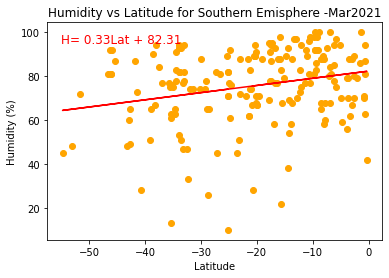

In [23]:
xs_values=south_df["Latitude"]
ys_values=south_df["Humidity (%)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ys_values)
regress_values = xs_values * slope + intercept
line_eq = f"H= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xs_values,ys_values,color="orange")
plt.title("Humidity vs Latitude for Southern Emisphere -Mar2021")


plt.plot(xs_values,regress_values,"r-")
plt.annotate(line_eq,(-55,95),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig("../WeatherPy/images/humidity_lat_south.png")

#print(f"The correlation coefficient between Temp and latitude is {round(st.pearsonr(xs_values,ys_values)[0],2)}")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [24]:
#Comment: Correlation seems to be independent between northern and southern cities. Both emispheres have similar slope and the r-sq is also similar. 

The r-squared is: 0.012417042421690963


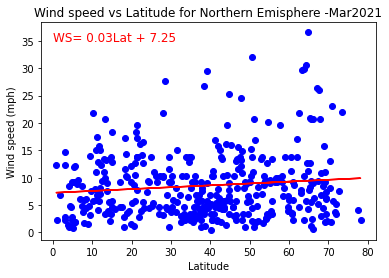

In [25]:
#Plot for wind speed northern emisphere
xn_values=north_df["Latitude"]
yn_values=north_df["Windspeed (mph)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xn_values, yn_values)
regress_values = xn_values * slope + intercept
line_eq = f"WS= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xn_values,yn_values,color="blue")
plt.title("Wind speed vs Latitude for Northern Emisphere -Mar2021")


plt.plot(xn_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind speed (mph)')
plt.savefig("../WeatherPy/images/wind_speed_lat_north.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [26]:
#Comment: the wind speed is slightly higher at more positive latitudes. Overall tends to range between 1 and 5 mph with some windy cities. Regression is positive with
#a small slope (0.03). Fit is poor due to effect of windy cities. There is a cluster of cities close to the Ecuator with wind speeds in the dominant range.

The r-squared is: 0.11859697323608842


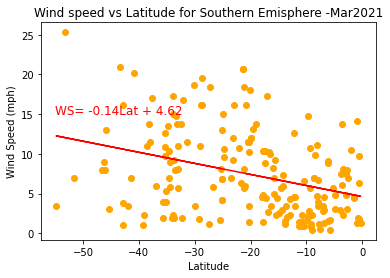

In [27]:
#Plot for wind speed southern emisphere
xs_values=south_df["Latitude"]
ys_values=south_df["Windspeed (mph)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ys_values)
regress_values = xs_values * slope + intercept
line_eq = f"WS= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xs_values,ys_values,color="orange")
plt.title("Wind speed vs Latitude for Southern Emisphere -Mar2021")


plt.plot(xs_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("../WeatherPy/images/wind_speed_lat_south.png")
#print(f"The correlation coefficient between Temp and latitude is {round(st.pearsonr(xs_values,ys_values)[0],2)}")
print(f"The r-squared is: {rvalue**2}")

plt.show()


In [28]:
#Comment: Regression is negative in the Southern emisphere. It's positive in the Northern. This indicates that there's a minimum in the trend around latitud zero.
#Slope is more negative compared to the slope of the northern emisphere. Again, a cluster of cities around the Ecuator can be seen in this plot. 

The r-squared is: 0.09362932498880915


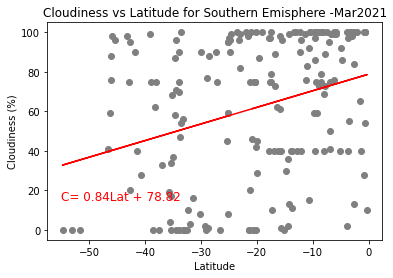

In [29]:
#Plot for Cloudiness southern emisphere
xs_values=south_df["Latitude"]
ys_values=south_df["Cloudiness (%)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xs_values, ys_values)
regress_values = xs_values * slope + intercept
line_eq = f"C= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xs_values,ys_values,color="gray")
plt.title("Cloudiness vs Latitude for Southern Emisphere -Mar2021")


plt.plot(xs_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../WeatherPy/images/cloud_lat_south.png")
#print(f"The correlation coefficient between Temp and latitude is {round(st.pearsonr(xs_values,ys_values)[0],2)}")
print(f"The r-squared is: {rvalue**2}")

plt.show()

In [30]:
#Comment: positive linear regression. Consistent with more clouds as we move further north. Poor linear fit, cloudiness spread around. 

The r-squared is: 0.07603594726579944


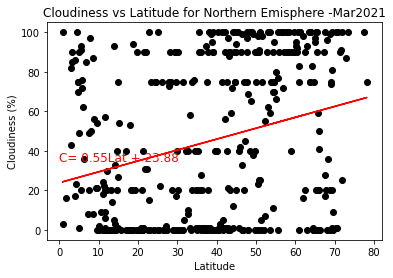

In [31]:
#Plot for wind speed northern emisphere
xn_values=north_df["Latitude"]
yn_values=north_df["Cloudiness (%)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(xn_values, yn_values)
regress_values = xn_values * slope + intercept
line_eq = f"C= {slope:.2f}Lat {'+' if intercept > 0 else ''} {intercept:.2f}"

plt.scatter(xn_values,yn_values,color="black")
plt.title("Cloudiness vs Latitude for Northern Emisphere -Mar2021")


plt.plot(xn_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig("../WeatherPy/images/cloud_lat_north.png")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [32]:
#Comment: positive linear regression. Consistent with more clouds as we move further north. Poor linear fit, cloudiness spread around. Analyzing both hemisphere by
#by separate, trends is always positive and slope is similar. Conclusion is that regardless of the fit, cloudiness seems to be greater as we move north. 

In [33]:
weather_df.to_csv(r'C:/Users/oscar/Desktop/Repos/python-api-challenge/WeatherPy/csv/weather_lat_data.csv')